In [3]:
# Code to unzip a TAR file on Windows
import tarfile 
# open file 
file = tarfile.open('VIAJES/202406_Viajes_distritos.tar') # zipped folder containing all data monthly (typically in .tar format)
# extracting file 
file.extractall('./basicos_distritos_viajes_202406') # unzipped folder containing several files
file.close() 

In [1]:
import config as cfg
import os
import pandas as pd
from utils import get_overview, open_gz

In [2]:
geometria_dir = cfg.GEOMETRIA_DATA
personas_dir = cfg.PERSONAS_DATA
viajes_dir = cfg.VIAJES_DATA

In [3]:
# personas_path = personas_dir/'basicos_municipios_personas_202201' # personas folder
viajes_path = viajes_dir/'basicos_distritos_viajes_202406' # viajes folder

In [4]:
# FIXME: Figure out how to open OD_rutas ('Error tokenizing data')
rutas = pd.read_csv(geometria_dir/'20220801_calidad_rutas.csv', encoding='latin1', sep=';')

In [7]:
rutas

,segmentsID,ligeros,trips,veh_inf,veh_sup,abs_deviation,relative_deviation
0,ii{`Gd{qUen@_K ci}`GnoqUtzAjX,20103,20378.854,6792.951333,20378.854,13310.048667,0.662093
1,cfc{Fhe}KeDy|F a`e{FhqpKdx@~sK,8946,6410.931,2136.977000,6410.931,6809.023000,0.761125
2,_thpFp~pJd[{`D m_hpF|nkJq[|eC ykepFhyvIihBjdY ...,15945,14166.913,4722.304333,14166.913,11222.695667,0.703838
3,_xshFpf}Tk`Bu|@ uhuhFva|Ttj@~V uhuhFva|TtOm@,17933,15201.167,5067.055667,15201.167,12865.944333,0.717445
4,_lzsFxr`Y|PhxF aazsFjegYkKicF ejzsFlefYbOteA i...,29774,19738.294,6579.431333,19738.294,23194.568667,0.779021
5,sg|fGh{rp@xoCu~M }h|fGbstp@bqCovO s|wfG|{cp@ul...,14647,11450.613,3816.871000,11450.613,10830.129000,0.739409


In [37]:
# get_overview(viajes)

In [6]:
viajes_13 = open_gz(viajes_path, 13)

c:\Users\rqg886\Desktop\thesis_project\mobility_data\utils.py:21: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(data, [f for f in os.listdir(data) if f.endswith('.csv.gz')][day]), compression='gzip', sep='|')


In [7]:
viajes_13.shape

(22316674, 15)

In [8]:
viajes_13.head()

,fecha,periodo,origen,destino,distancia,actividad_origen,actividad_destino,estudio_origen_posible,estudio_destino_posible,residencia,renta,edad,sexo,viajes,viajes_km
0,20240614,6,01009_AM,01001,10-50,frecuente,casa,no,no,1,10-15,NaN,NaN,2.422,41.966
1,20240614,12,01009_AM,01001,10-50,frecuente,casa,no,no,1,10-15,NaN,NaN,2.706,37.917
2,20240614,14,01009_AM,01001,10-50,frecuente,casa,no,no,1,10-15,NaN,NaN,2.321,43.158
3,20240614,15,01009_AM,01001,10-50,frecuente,casa,no,no,1,10-15,NaN,NaN,2.706,37.917
4,20240614,17,01009_AM,01001,10-50,frecuente,casa,no,no,1,10-15,NaN,NaN,4.743,79.651


In [9]:
viajes_13.tail()

,fecha,periodo,origen,destino,distancia,actividad_origen,actividad_destino,estudio_origen_posible,estudio_destino_posible,residencia,renta,edad,sexo,viajes,viajes_km
22316669,20240614,2,FRI15,FRI15,0.5-2,no_frecuente,trabajo_estudio,no,no,20,10-15,45-65,hombre,2.691,1.830
22316670,20240614,9,20036,FRI15,2-10,no_frecuente,trabajo_estudio,no,no,20,10-15,45-65,hombre,2.691,5.868
22316671,20240614,20,25051_AM,FRJ15,2-10,no_frecuente,trabajo_estudio,no,no,17,10-15,45-65,NaN,2.568,24.482
22316672,20240614,19,06095,PT186,10-50,no_frecuente,trabajo_estudio,no,no,6,10-15,NaN,NaN,2.595,30.895
22316673,20240614,15,0601506,PT186,2-10,no_frecuente,trabajo_estudio,no,no,6,10-15,0-25,NaN,7.043,26.621


In [10]:
viajes_13['destino'].value_counts().head(25)

destino
0801902    103879
0801903     85428
0801910     73251
0801909     65804
2807901     65052
0801905     57302
0801901     53362
2906708     50962
0801907     50516
0306507     50253
2807908     50226
2807909     50016
0801904     49497
2807920     44712
3003004     44532
2807911     44296
0801908     43837
0704004     43400
0801906     42623
4625010     42493
2807907     42325
2807905     41213
2807910     40341
46190       39947
2906707     39825
Name: count, dtype: int64

In [11]:
# madrid = viajes_13[viajes_13['origen'].str.contains("28079") & viajes_13['destino'].str.contains("28079")]
madrid = viajes_13[viajes_13['origen'].str.startswith("28") & viajes_13['destino'].str.startswith("28")]


In [12]:
len(madrid)

1795394

In [13]:
subset = madrid.tail(25)

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

In [14]:
subset

,fecha,periodo,origen,destino,distancia,actividad_origen,actividad_destino,estudio_origen_posible,estudio_destino_posible,residencia,renta,edad,sexo,viajes,viajes_km
22162798,20240614,23,28903,28903,2-10,no_frecuente,trabajo_estudio,no,no,28,>15,45-65,mujer,8.854,29.854
22162799,20240614,12,28006,28903,2-10,no_frecuente,trabajo_estudio,no,no,28,>15,65-100,hombre,2.461,22.247
22162800,20240614,4,28045,28903,2-10,no_frecuente,trabajo_estudio,no,no,28,>15,65-100,mujer,4.159,19.466
22162801,20240614,7,28045,28903,2-10,no_frecuente,trabajo_estudio,no,no,28,>15,65-100,mujer,4.159,16.041
22162802,20240614,8,28045,28903,2-10,no_frecuente,trabajo_estudio,no,no,28,>15,65-100,hombre,4.698,19.504
22162803,20240614,10,28045,28903,2-10,no_frecuente,trabajo_estudio,no,no,28,>15,65-100,hombre,2.237,9.185
22162804,20240614,15,28045,28903,2-10,no_frecuente,trabajo_estudio,no,no,28,>15,65-100,hombre,2.461,15.986
22162805,20240614,16,28045,28903,2-10,no_frecuente,trabajo_estudio,no,no,28,>15,65-100,hombre,2.461,16.249
22162806,20240614,19,28045,28903,2-10,no_frecuente,trabajo_estudio,no,no,28,>15,65-100,mujer,4.159,26.212
22162807,20240614,20,28045,28903,2-10,no_frecuente,trabajo_estudio,no,no,28,>15,65-100,hombre,4.922,36.967


In [21]:
nombres_distritos = pd.read_csv(r'C:\Users\rqg886\Desktop\thesis_project\mobility_data\ZONIFICACION\distritos\nombres_distritos.csv', sep = '|')
poblacion_distritos = pd.read_csv(r'C:\Users\rqg886\Desktop\thesis_project\mobility_data\ZONIFICACION\distritos\poblacion_distritos.csv', sep = '|')

In [39]:
distritos_madrid = nombres_distritos[nombres_distritos['ID'].str.startswith("28")]
ciudad_madrid = distritos_madrid[distritos_madrid['name'].str.contains("Madrid", case=False, na=False)]
# FIXME: Filter based on these data: https://www.madrid.es/portales/munimadrid/es/Inicio/El-Ayuntamiento/Estadistica/Areas-de-informacion-estadistica/Territorio-climatologia-y-medio-ambiente/Territorio/Mapas-de-Distritos-y-Barrios/?vgnextfmt=default&vgnextoid=240d64c49579f410VgnVCM1000000b205a0aRCRD&vgnextchannel=e59b40ebd232a210VgnVCM1000000b205a0aRCRD

In [48]:
distritos_madrid.head(10)

,ID,name
2010,28002,Ajalvir
2011,28004,"Álamo, El"
2012,2800501,Alcalá de Henares distrito 01
2013,2800502,Alcalá de Henares distrito 02
2014,2800503,Alcalá de Henares distrito 03
2015,2800504,Alcalá de Henares distrito 04
2016,2800505,Alcalá de Henares distrito 05
2017,28006,Alcobendas
2018,2800701,Alcorcón distrito 01
2019,2800702,Alcorcón distrito 02


In [22]:
poblacion_distritos

,01001,2925.0
0,01002,10307.0
1,01004_AM,3005.0
2,01009_AM,4599.0
3,01010,2951.0
4,01017_AM,4314.0
...,...,...
3786,34072453051,NaN
3787,34072453052,NaN
3788,34074053074,NaN
3789,34074253075,NaN


In [33]:
import geopandas as gpd

# Read the shapefile
gdf = gpd.read_file(r"C:\Users\rqg886\Desktop\THESIS_PROJECT\mobility_data\ZONIFICACION\distritos\zonificacion_distritos.shp")
centroides = gpd.read_file(r"C:\Users\rqg886\Desktop\THESIS_PROJECT\mobility_data\ZONIFICACION\distritos\zonificacion_distritos_centroides.shp")

gdf.head()

,ID,geometry
0,01001,"MULTIPOLYGON (((538090.184 4737372.731, 537856..."
1,01002,"MULTIPOLYGON (((501984.889 4753913.870, 501945..."
2,01004_AM,"MULTIPOLYGON (((488613.969 4778775.797, 488800..."
3,01009_AM,"POLYGON ((554658.552 4740793.546, 554617.177 4..."
4,01010,"POLYGON ((499938.436 4768365.760, 499305.175 4..."


In [27]:
gdf[gdf['ID'].str.startswith("28")]

,ID,geometry
2010,28002,"POLYGON ((457987.167 4489499.652, 457988.033 4..."
2011,28004,"POLYGON ((417567.101 4454825.965, 417579.412 4..."
2012,2800501,"POLYGON ((469312.518 4480657.079, 469182.264 4..."
2013,2800502,"POLYGON ((468962.230 4480454.088, 469182.264 4..."
2014,2800503,"POLYGON ((467098.397 4481316.752, 464800.755 4..."
...,...,...
2190,28180,"POLYGON ((482946.380 4443381.569, 482914.888 4..."
2191,28181,"POLYGON ((425966.371 4468117.456, 426067.705 4..."
2192,28183_AM,"MULTIPOLYGON (((393107.659 4487438.017, 393089..."
2193,28901_AM,"POLYGON ((457634.828 4516414.273, 457477.230 4..."


In [43]:
madrid_city_gdf = gdf[gdf['ID'].isin(ciudad_madrid['ID'])]

In [47]:
len(madrid_city_gdf)

24

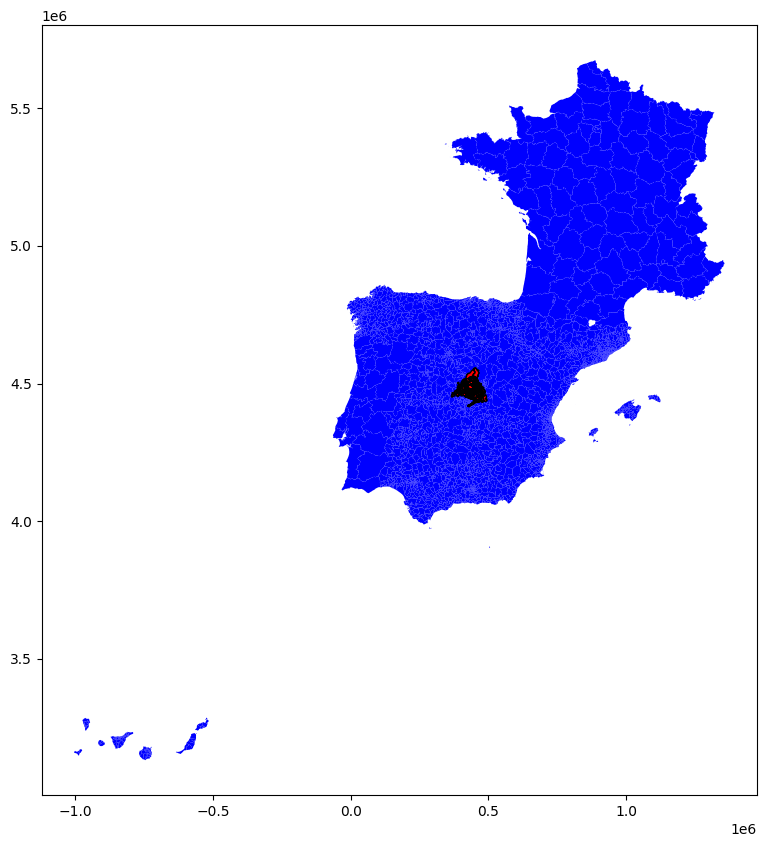

In [45]:
import matplotlib.pyplot as plt
ax = gdf.plot(color='blue', figsize=(10, 10))
gdf[gdf['ID'].str.startswith("28")].plot(ax=ax, color='red', edgecolor='black')
plt.show()

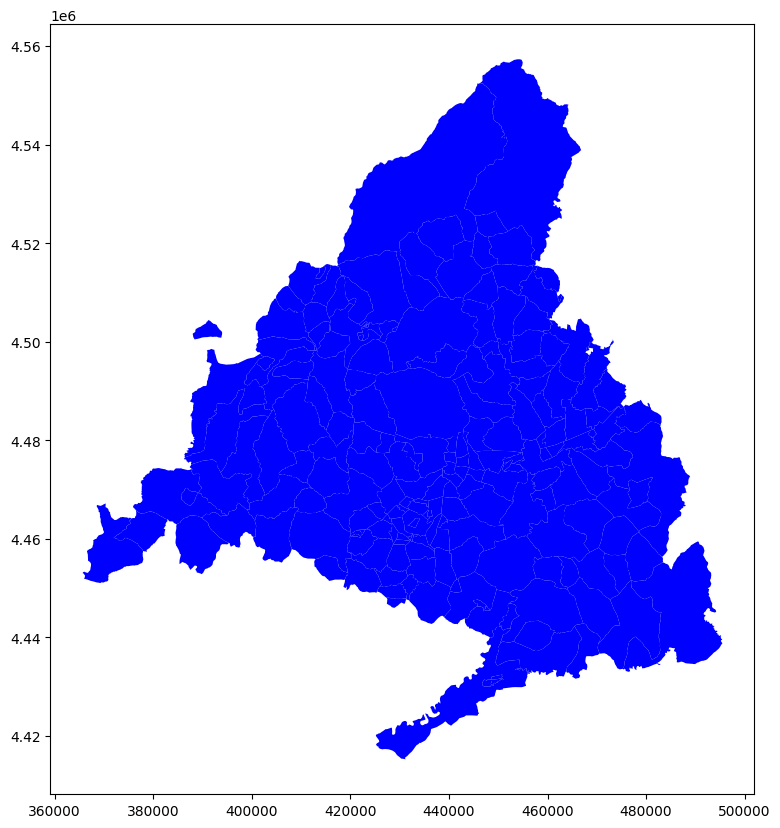

In [46]:
ax = gdf[gdf['ID'].str.startswith("28")].plot(color='blue', figsize=(10, 10))

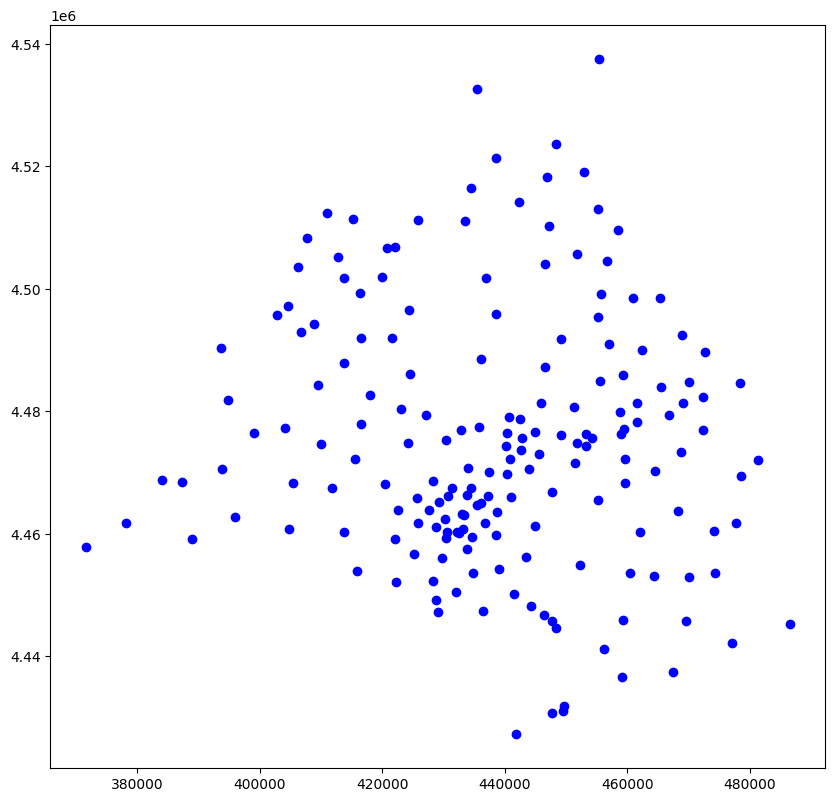

In [36]:
ax = centroides[centroides['ID'].str.startswith("28")].plot(color='blue', figsize=(10, 10))

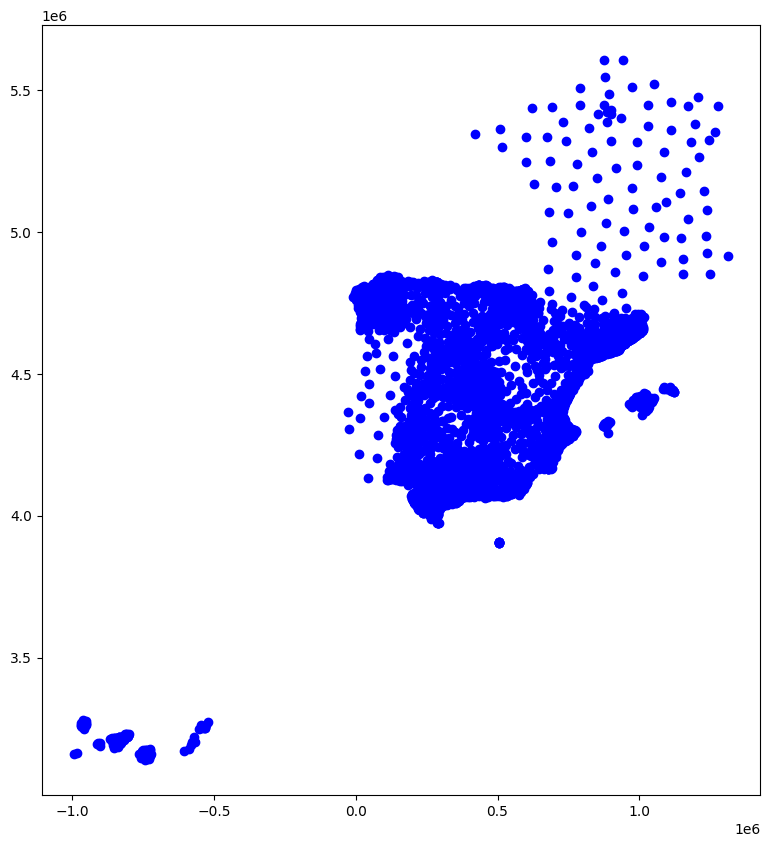

In [37]:
ax = centroides.plot(color='blue', figsize=(10, 10))

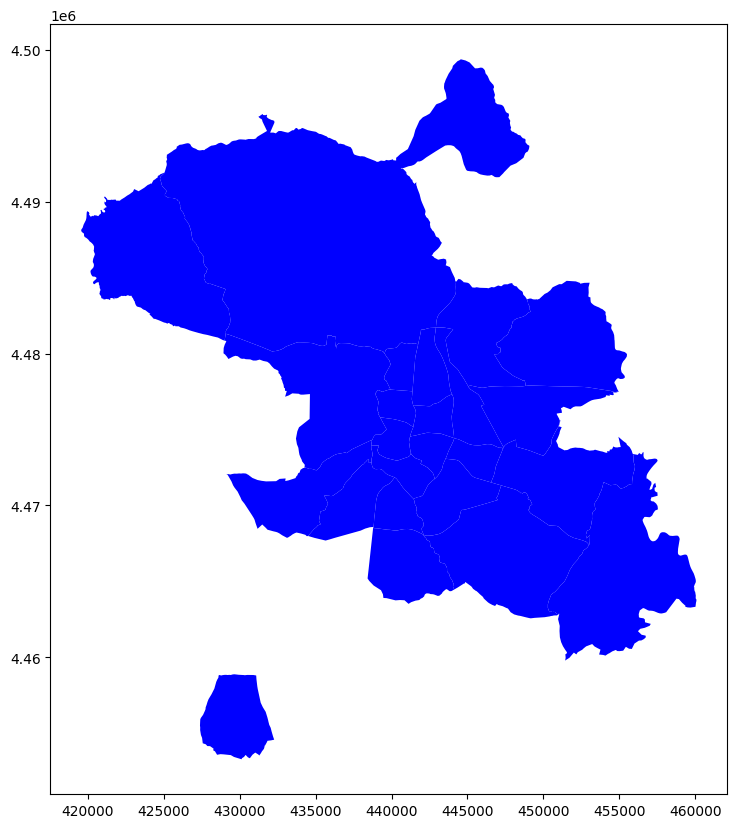

In [44]:
ax = madrid_city_gdf.plot(color='blue', figsize=(10, 10))